<font size="5">**Title: Choosing a Hotel Location in London**</font>

<font size="4">**Introduction**</font>

In this lab, we will deploy unsupervised learning using k-means to cluster London Wards which have similar geospatial characteristics to the neighbourhood of the Library Hotel in New York, Manhattan. The Places API from Foursquare will be used to extract venue categories and the GeoPy package will used to convert addresses into latitude and longitude coordinates.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

<a href="#item1">Part 1: Import and Install Packages</a> <br>
<a href="#item2">Part 2: Download and Transform Data into a Pandas Dataframe</a><br>
<a href="#item3">Part 3: Foursquare Set-up</a><br>
<a href="#item4">Part 4: Analyse Each Ward in London</a><br>
<a href="#item5">Part 5: Cluster London Wards</a><br>
<a href="#item6">Part 6: Examine London Locations for Library Hotel</a><br>

 
</font>
</div>

<a id='item1'></a> 

## Part 1: Import and Install Packages

This section covers all of the necessary libraries and packages.

In [6]:
!pip install geopy
!pip install geopandas 

import pandas as pd
from geopy.geocoders import Nominatim

!pip install folium # folium is a map rendering library
import folium

# Install Requests
!pip install requests 
# Import Requests
import requests

<a id='item2'></a> 

## Part 2: Download and Transforma Data into a Pandas Dataframe

### 2.1 Addresses

The first step is to obtain the address of the London Wards and Library Hotel 

### 2.1.1 London Wards: Addresses

The addresses for the London Wards will be downloaded from the following document which was generated by the Greater London Authority (GLA):
https://londondatastore-upload.s3.amazonaws.com/dataset/excel-mapping-template-for-london-boroughs-and-wards/Mapping-template-london-ward-map-2014.xls

In [7]:
# Create a DataFrame df to download and hold the data
df_01 = pd.read_excel("https://londondatastore-upload.s3.amazonaws.com/dataset/excel-mapping-template-for-london-boroughs-and-wards/Mapping-template-london-ward-map-2014.xls")

In [8]:
# Check Column Headers and First 5 rows
df_01.head()

,Code,Ward name,Borough name,shape,Values,Unnamed: 5,Unnamed: 6,Ensure Macros are enabled then paste your data into column E,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,MapNameToShape.1,Unnamed: 51
0,E05000026,Abbey,Barking and Dagenham,Freeform_623,128.292,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E05000405,Chessington South,Kingston upon Thames,Chessington South,Freeform_4,Freeform 4
1,E05000027,Alibon,Barking and Dagenham,Freeform_629,136.442,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E05000414,Tolworth and Hook Rise,Kingston upon Thames,Tolworth and Hook Rise,Freeform_5,Freeform 5
2,E05000028,Becontree,Barking and Dagenham,Freeform_628,128.809,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E05000401,Berrylands,Kingston upon Thames,Berrylands,Freeform_6,Freeform 6
3,E05000029,Chadwell Heath,Barking and Dagenham,Freeform_634,338.422,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E05000400,Alexandra,Kingston upon Thames,Alexandra,Freeform_7,Freeform 7
4,E05000030,Eastbrook,Barking and Dagenham,Freeform_633,345.060,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E05000402,Beverley,Kingston upon Thames,Beverley,Freeform_8,Freeform 8


In [9]:
# Dataframe Shape
df_01.shape

(644, 52)

From the DataFrame, the data of interest are the column "Ward Name" and "Borough Name"

In [10]:
# Create a Second DataFrame which will only hold the relevant information
df_02 = pd.DataFrame()

# Copy the data in "Ward name" from df_01 to df_02
df_02["Ward name"]= df_01["Ward name"]

# Copy the data in "Borough name" from df_01 to df_02
df_02["Borough name"] = df_01["Borough name"] 

In [11]:
# Check Column Headers and First 5 rows
df_02.head()

,Ward name,Borough name
0,Abbey,Barking and Dagenham
1,Alibon,Barking and Dagenham
2,Becontree,Barking and Dagenham
3,Chadwell Heath,Barking and Dagenham
4,Eastbrook,Barking and Dagenham


In [12]:
# Check DataFrame bottom 5 rows
df_02.tail()

,Ward name,Borough name
639,NaN,NaN
640,NaN,NaN
641,NaN,NaN
642,NaN,NaN
643,NaN,NaN


We need to remove any "NaN" observations from the DataFrame.

In [13]:
# Using dropna() we will remove any NaN rows from the DataFrame
df_02 = df_02.dropna()

In [14]:
# Check DataFrame bottom 5 rows
df_02.tail()

,Ward name,Borough name
625,Tachbrook,Westminster
626,Vincent Square,Westminster
627,Warwick,Westminster
628,Westbourne,Westminster
629,West End,Westminster


We are going to check next how many London Wards are in the dataset. The reason for grouping the Ward name with the Borough name is due to some Wards having same name, yet they are in different Boroughs.

In [15]:
# Check how many Wards there are in London
df_02.groupby(['Ward name', 'Borough name']).nunique()

Ward name  Borough name
Ward name               Borough name                                   
Abbey                   Barking and Dagenham            1             1
                        Merton                          1             1
Abbey Road              Westminster                     1             1
Abbey Wood              Greenwich                       1             1
Abingdon                Kensington and Chelsea          1             1
...                                                   ...           ...
Woolwich Riverside      Greenwich                       1             1
Worcester Park          Sutton                          1             1
Wormholt and White City Hammersmith and Fulham          1             1
Yeading                 Hillingdon                      1             1
Yiewsley                Hillingdon                      1             1

[630 rows x 2 columns]

There are 630 Wards in London. Next, we will check how many Boroughs there are in London.

In [16]:
# Check how many Boroughs there are in London
df_02["Borough name"].nunique()

33

In summary, there are in London **630 Wards** and **33 Boroughs**.

In [17]:
# Add City column
df_02 ['City'] = 'London'
df_02.head()

,Ward name,Borough name,City
0,Abbey,Barking and Dagenham,London
1,Alibon,Barking and Dagenham,London
2,Becontree,Barking and Dagenham,London
3,Chadwell Heath,Barking and Dagenham,London
4,Eastbrook,Barking and Dagenham,London


### 2.1.2 Library Hotel: Address
The Library Hotel Address is: 299 Madison Avenue Entrance on, E 41st St, New York, NY 10017, United States. It was taken from the official website of the hotel https://libraryhotel.com

In [18]:
# Create a new DataFrame to hold the London Wards addresses and Library Hotel Address
df_03 = pd.DataFrame()
df_03 = df_02
df_03.head()

,Ward name,Borough name,City
0,Abbey,Barking and Dagenham,London
1,Alibon,Barking and Dagenham,London
2,Becontree,Barking and Dagenham,London
3,Chadwell Heath,Barking and Dagenham,London
4,Eastbrook,Barking and Dagenham,London


In [19]:
# Create a dictionary to append to the DataFrame
Library_Hotel = {'Ward name':'Grand Central Terminal','Borough name':'Manhattan','City':'New York'}

In [20]:
# Append Library Hotel Address to DataFrame
df_03 = df_03.append(Library_Hotel, ignore_index = True) 

In [21]:
# Check that Library Hotel address has been added
df_03.tail()

,Ward name,Borough name,City
626,Vincent Square,Westminster,London
627,Warwick,Westminster,London
628,Westbourne,Westminster,London
629,West End,Westminster,London
630,Grand Central Terminal,Manhattan,New York


### 2.2 Latitude and Longitude
So far, we have captured all the areas of interest in the DataFrame **df_03**, the next step is to extract the latitude and longitude for each of those addresses. To extract the latitude and longitude addresses, we will be using the Geopy and Geopandas packages together with Nominatum Geocoding service

In [22]:
df_04 = pd.DataFrame()
df_04 = df_03

In [23]:
# Step 1: Create Locator which holds the Nominatim Geocode Service
locator = Nominatim(user_agent="myGeocoder")

In [24]:
# Step 2: Concatenate addresses
df_04['Address'] = df_04['Ward name'] + ',' + \
                   df_04['Borough name'] + ',' + \
                   df_04['City']

df_04.head()

,Ward name,Borough name,City,Address
0,Abbey,Barking and Dagenham,London,"Abbey,Barking and Dagenham,London"
1,Alibon,Barking and Dagenham,London,"Alibon,Barking and Dagenham,London"
2,Becontree,Barking and Dagenham,London,"Becontree,Barking and Dagenham,London"
3,Chadwell Heath,Barking and Dagenham,London,"Chadwell Heath,Barking and Dagenham,London"
4,Eastbrook,Barking and Dagenham,London,"Eastbrook,Barking and Dagenham,London"


Below is the code which was used to extract the latitude and longitude using Nominatim for the "Address" column in the DataFrame df_04. The service is unstable and tends to time out. Hence, a copy of the extracted raw data from the first successful geocoding attempt using Nominatim was saved at the following link: https://raw.githubusercontent.com/toulio/capstone-project/master/df_04.csv

And the following file will be used in the rest of the notebook which is a cleansed version of the above csv file:
https://raw.githubusercontent.com/toulio/capstone-project/master/df_04_geo.csv

In [20]:
## Step 3: Delay our Geocoding 1 second per address using RateLimiter
#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
## Step 4: Create Location column from the Geocode we created
#df_04['location'] = df_04['Address'].apply(geocode)
## Step 5: Create Latitude and Longitude from Location Column
#df_04['point'] = df_04['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [47]:
# Download the Geocoded data 
df_04 = pd.read_csv("https://raw.githubusercontent.com/toulio/capstone-project/master/df_04_geo.csv")

In [48]:
# Check DataFrame column headers
df_04.head()

,Unnamed: 0,Ward name,Borough name,City,Address,Latitude,Longitude
0,0,Abbey,Barking and Dagenham,London,"Abbey,Barking and Dagenham,London",51.546127,0.091834
1,1,Alibon,Barking and Dagenham,London,"Alibon,Barking and Dagenham,London",51.548280,0.153244
2,2,Becontree,Barking and Dagenham,London,"Becontree,Barking and Dagenham,London",51.540311,0.126524
3,3,Chadwell Heath,Barking and Dagenham,London,"Chadwell Heath,Barking and Dagenham,London",51.567986,0.127994
4,4,Eastbrook,Barking and Dagenham,London,"Eastbrook,Barking and Dagenham,London",51.551565,0.161543


In [49]:
# Remove Unnamed Column
df_04.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [50]:
# Check shape of DataFrame
df_04.shape

(631, 6)

In [51]:
# Check for Null elements in the DataFrame
df_04['Latitude'].isnull().sum()

34

There are 34 addresses that Nominatium goecoding services for which no latitude and longitude could be determined. These addresses will need to be dropped.

In [52]:
# Delete null addresses
df_04.dropna(axis=0,how='any',inplace=True)

In [53]:
# Reset Index
df_04.reset_index(drop=True,inplace=True)

In [54]:
# Check column headers
df_04.head()

,Ward name,Borough name,City,Address,Latitude,Longitude
0,Abbey,Barking and Dagenham,London,"Abbey,Barking and Dagenham,London",51.546127,0.091834
1,Alibon,Barking and Dagenham,London,"Alibon,Barking and Dagenham,London",51.548280,0.153244
2,Becontree,Barking and Dagenham,London,"Becontree,Barking and Dagenham,London",51.540311,0.126524
3,Chadwell Heath,Barking and Dagenham,London,"Chadwell Heath,Barking and Dagenham,London",51.567986,0.127994
4,Eastbrook,Barking and Dagenham,London,"Eastbrook,Barking and Dagenham,London",51.551565,0.161543


In [55]:
# Check shape
df_04.shape

(597, 6)

### 2.3 Create Map of London Wards
In this section, a map showing all of London 597 Wards will be created.

In [56]:
# create map of London Wards using latitude and longitude values
map_london = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

lat = 0
lng = 0
borough =""
postcode = ""

# add markers to map
for i in range(0,len(df_04)):
    # Step 1: Get geospatial coordinates for each Neighbourhood
    lat = df_04["Latitude"][i]
    lng = df_04["Longitude"][i]
    ward = df_04["Ward name"][i]
    borough = df_04["Borough name"][i]
    # Step 2: Parse geospatial coordinates onto the map of Toronoto 
    label = '{}, {}'.format(ward, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)
    
map_london

If we zoom out from the map above, there are three addresses for which the geocoding service was not accurate and will be dropped from the DataFrame

In [57]:
# Addresses which are mislocated
x = ['Valley,Waltham Forest,London','Weavers,Tower Hamlets,London','West End,Westminster,London']

for j in range(len(x)):
    df_04.reset_index(drop=True,inplace=True)
    for i in range(len(df_04)):
        if (df_04.loc[i, 'Address'] == x[j]):
            df_04.drop(i,inplace=True)
            
df_04.reset_index(drop=True,inplace=True)           

In [58]:
# create map of London Wards using latitude and longitude values
map_london = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

lat = 0
lng = 0
borough =""
postcode = ""

# add markers to map
for i in range(0,len(df_04)):
    # Step 1: Get geospatial coordinates for each Neighbourhood
    lat = df_04["Latitude"][i]
    lng = df_04["Longitude"][i]
    ward = df_04["Ward name"][i]
    borough = df_04["Borough name"][i]
    # Step 2: Parse geospatial coordinates onto the map of London 
    label = '{}, {}'.format(ward, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)
    
map_london

<a id='item3'></a> 

## Part 3: Foursquare Set-up
In this section a DataFrame which contains the venue information within each London Ward will be created.

In [59]:
CLIENT_ID = '4EGYKOC2CGZBHUTI5VG0KUOEGWHJ4ES05WKRQHHDFHHC2JIW' # your Foursquare ID
CLIENT_SECRET = 'TGXXOPMD0ZXQPOAMQWRJCFC0C0ES1NZBQDENTDEZ5B4OLUDV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### 3.1 Explore First London Ward in DataFrame
As part of testing, the first address in the df_04 DataFrame will be explored

In [60]:
# Get the name of the first address
df_04.loc[0, 'Address']

'Abbey,Barking and Dagenham,London'

Get the Ward latitude and longitude value

In [61]:
ward_latitude = df_04.loc[0, 'Latitude'] # neighborhood latitude value
ward_longitude = df_04.loc[0, 'Longitude'] # neighborhood longitude value

ward_name = df_04.loc[0, 'Address'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(ward_name, 
                                                               ward_latitude, 
                                                               ward_longitude))

Latitude and longitude values of Abbey,Barking and Dagenham,London are 51.54612675, 0.091834341.


Now, let's get the top 100 venues that are in Harbourfront with a radius of 1600 meters

First, let's create the GET request URL. <br>
Name of URL is **url**.

In [62]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1600 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ward_latitude, 
    ward_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4EGYKOC2CGZBHUTI5VG0KUOEGWHJ4ES05WKRQHHDFHHC2JIW&client_secret=TGXXOPMD0ZXQPOAMQWRJCFC0C0ES1NZBQDENTDEZ5B4OLUDV&v=20180605&ll=51.54612675,0.091834341&radius=1600&limit=100'

Send the GET request and examine the resutls

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e52e63e98205d001ba1e07b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Barking and Dagenham',
  'headerFullLocation': 'Barking and Dagenham, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 51.56052676440002,
    'lng': 0.11494655969946531},
   'sw': {'lat': 51.53172673559998, 'lng': 0.06872212230053469}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb76415ef159c74131c77f7',
       'name': 'Barking Park',
       'location': {'address': 'Longbridge Rd',
        'lat': 51.54521668553514,
        'lng': 0.08613355325603986,
        'labeledLatLngs': [{'label': 'display',
   

All the information is in the *items* key. <br>
Before we proceed, let's create the **get_category_type** function

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [65]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Barking Park,Park,51.545217,0.086134
1,Nando's,Portuguese Restaurant,51.539780,0.082297
2,Eastbury Manor House,History Museum,51.532973,0.099741
3,Cristina's,Steakhouse,51.536523,0.076672
4,Mayesbrook Park,Park,51.549842,0.108544


And how many venues were returned by Foursquare?

In [66]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

32 venues were returned by Foursquare.


### 3.2 Explore London Wards 
A function will be created to repeated the same process as above but all London Wards in the DataFrame

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=1600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Address', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Next step is to run the above function on each Ward and create a new dataframe called *df_05*.

In [68]:
df_05 = getNearbyVenues(names=df_04['Address'],
                                   latitudes=df_04['Latitude'],
                                   longitudes=df_04['Longitude']
                                  )

Abbey,Barking and Dagenham,London
Alibon,Barking and Dagenham,London
Becontree,Barking and Dagenham,London
Chadwell Heath,Barking and Dagenham,London
Eastbrook,Barking and Dagenham,London
Eastbury,Barking and Dagenham,London
Gascoigne,Barking and Dagenham,London
Goresbrook,Barking and Dagenham,London
Heath,Barking and Dagenham,London
Longbridge,Barking and Dagenham,London
Mayesbrook,Barking and Dagenham,London
Parsloes,Barking and Dagenham,London
River,Barking and Dagenham,London
Thames,Barking and Dagenham,London
Valence,Barking and Dagenham,London
Village,Barking and Dagenham,London
Whalebone,Barking and Dagenham,London
Brunswick Park,Barnet,London
Burnt Oak,Barnet,London
Childs Hill,Barnet,London
Colindale,Barnet,London
Coppetts,Barnet,London
East Barnet,Barnet,London
East Finchley,Barnet,London
Edgware,Barnet,London
Finchley Church End,Barnet,London
Garden Suburb,Barnet,London
Golders Green,Barnet,London
Hale,Barnet,London
Hendon,Barnet,London
High Barnet,Barnet,London
Mill Hill,Ba

In [69]:
# Check Shape and Size of DataFrame
print(df_05.shape)
df_05.head()

(39271, 7)


,Address,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abbey,Barking and Dagenham,London",51.546127,0.091834,Barking Park,51.545217,0.086134,Park
1,"Abbey,Barking and Dagenham,London",51.546127,0.091834,Nando's,51.539780,0.082297,Portuguese Restaurant
2,"Abbey,Barking and Dagenham,London",51.546127,0.091834,Eastbury Manor House,51.532973,0.099741,History Museum
3,"Abbey,Barking and Dagenham,London",51.546127,0.091834,Cristina's,51.536523,0.076672,Steakhouse
4,"Abbey,Barking and Dagenham,London",51.546127,0.091834,Mayesbrook Park,51.549842,0.108544,Park


In [70]:
# Let's check how many venues were returned for each Ward
df_05.groupby('Address').count()

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Address,,,,,,
"Abbey Road,Westminster,London",100,100,100,100,100,100
"Abbey Wood,Greenwich,London",14,14,14,14,14,14
"Abbey,Barking and Dagenham,London",32,32,32,32,32,32
"Abbey,Merton,London",100,100,100,100,100,100
"Abingdon,Kensington and Chelsea,London",100,100,100,100,100,100
...,...,...,...,...,...,...
"Woolwich Riverside,Greenwich,London",76,76,76,76,76,76
"Worcester Park,Sutton,London",34,34,34,34,34,34
"Wormholt and White City,Hammersmith and Fulham,London",100,100,100,100,100,100


In [71]:
# Let's check how many unique catergories of each venue have been identified
print('There are {} uniques categories.'.format(len(df_05['Venue Category'].unique())))

There are 436 uniques categories.


<a id='item4'></a> 

## Part 4: Analyse Each Ward in London
A DataFrame will be created with all the Venue information for each London Ward

In [72]:
# one hot encoding
df_06 = pd.get_dummies(df_05[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_06['Address'] = df_05['Address'] 

# move Address column to the first column
fixed_columns = [df_06.columns[-1]] + list(df_06.columns[:-1])
df_06 = df_06[fixed_columns]

df_06.head()

,Address,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey,Barking and Dagenham,London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Abbey,Barking and Dagenham,London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Abbey,Barking and Dagenham,London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Abbey,Barking and Dagenham,London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Abbey,Barking and Dagenham,London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Check shape of DataFrame
df_06.shape

(39271, 437)

In [74]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
df_07 = df_06.groupby('Address').mean().reset_index()
df_07.head()

,Address,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abbey Wood,Greenwich,London",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,"Abbey,Barking and Dagenham,London",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Abbey,Merton,London",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Abingdon,Kensington and Chelsea,London",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00


In [75]:
# Let's print each Ward along with the top 5 most common venues
t = 5 # number of top venues 

for ward in df_07['Address']:
    print("----"+ward+"----")
    temp = df_07[df_07['Address'] == ward].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(t))
    print('\n')

----Abbey Road,Westminster,London----
                 venue  freq
0                 Café  0.09
1                  Pub  0.08
2    French Restaurant  0.04
3               Bakery  0.04
4  Japanese Restaurant  0.03


----Abbey Wood,Greenwich,London----
           venue  freq
0    Supermarket  0.14
1  Grocery Store  0.14
2  Train Station  0.07
3         Bakery  0.07
4  Historic Site  0.07


----Abbey,Barking and Dagenham,London----
                venue  freq
0         Supermarket  0.12
1       Grocery Store  0.09
2                 Pub  0.09
3                Park  0.06
4  Chinese Restaurant  0.06


----Abbey,Merton,London----
                venue  freq
0                 Pub  0.08
1       Grocery Store  0.07
2                Café  0.06
3  Italian Restaurant  0.05
4         Supermarket  0.05


----Abingdon,Kensington and Chelsea,London----
                venue  freq
0               Hotel  0.08
1                Café  0.07
2                 Pub  0.06
3          Restaurant  0.05
4  Italian Re

Now, a DataFrame will be created where the venues are sorted in an descending order

In [76]:
# Step 1: Create Function which Returns Top Venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
# Step 2: Create DataFrame with Top Venues
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Address']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_08 = pd.DataFrame(columns=columns)
df_08['Address'] = df_07['Address']

for ind in np.arange(df_07.shape[0]):
    df_08.iloc[ind, 1:] = return_most_common_venues(df_07.iloc[ind, :], num_top_venues)

df_08.head()

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbey Road,Westminster,London",Café,Pub,French Restaurant,Bakery,Gym / Fitness Center,Middle Eastern Restaurant,Japanese Restaurant,Hotel,Market,Garden
1,"Abbey Wood,Greenwich,London",Grocery Store,Supermarket,Fish & Chips Shop,Park,Historic Site,Lake,Train Station,Food & Drink Shop,Pub,Indian Restaurant
2,"Abbey,Barking and Dagenham,London",Supermarket,Grocery Store,Pub,Chinese Restaurant,Park,Discount Store,Theater,Spa,Gym,Sandwich Place
3,"Abbey,Merton,London",Pub,Grocery Store,Café,Coffee Shop,Park,Italian Restaurant,Supermarket,Bar,Burger Joint,Thai Restaurant
4,"Abingdon,Kensington and Chelsea,London",Hotel,Café,Pub,Restaurant,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Gym / Fitness Center,Indian Restaurant,Middle Eastern Restaurant


In [78]:
df_08.tail()

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
589,"Woolwich Riverside,Greenwich,London",Pub,Grocery Store,Park,Coffee Shop,Plaza,Clothing Store,Fast Food Restaurant,Supermarket,Gym / Fitness Center,Sandwich Place
590,"Worcester Park,Sutton,London",Bus Stop,Pub,Grocery Store,Supermarket,Park,Train Station,Coffee Shop,English Restaurant,Gym,Gym / Fitness Center
591,"Wormholt and White City,Hammersmith and Fulham...",Pub,Café,Bakery,Indian Restaurant,Coffee Shop,Gym / Fitness Center,Chinese Restaurant,Thai Restaurant,Pizza Place,Park
592,"Yeading,Hillingdon,London",Grocery Store,Indian Restaurant,Clothing Store,Fast Food Restaurant,Supermarket,Electronics Store,Coffee Shop,Hotel,Golf Course,Sporting Goods Shop
593,"Yiewsley,Hillingdon,London",Supermarket,Pub,Bed & Breakfast,Grocery Store,Hotel,Bar,Warehouse Store,Chinese Restaurant,Electronics Store,Auto Garage


In [79]:
# Ceck Top Venues around Library Hotel
x=0
for i in range(len(df_08)):
    if df_08.iloc[i][0] == 'Grand Central Terminal,Manhattan,New York':
        x = i
        
df_08.iloc[[x]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
218,"Grand Central Terminal,Manhattan,New York",Theater,Hotel,Plaza,American Restaurant,Korean Restaurant,Gym,Gym / Fitness Center,Japanese Restaurant,Boxing Gym,Food Truck


<a id='item5'></a> 

# Part 5: Cluster London Wards

In [80]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 5.1 Level 1: Cluster All London Addresses 

In [82]:
# DataFrame to be Clustered
df_09 = df_07.drop('Address',1) # We Nedd to drop the Address line (str) for clustering purposes 
df_09.head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00


In [83]:
# DataFrame Holding the Addresses for merging back post-cluster
df_10 = df_07[['Address']]
df_10.head()

,Address
0,"Abbey Road,Westminster,London"
1,"Abbey Wood,Greenwich,London"
2,"Abbey,Barking and Dagenham,London"
3,"Abbey,Merton,London"
4,"Abingdon,Kensington and Chelsea,London"


In [84]:
# Calculate Silhouette Score for Various k clusters so that to identify optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init=150).fit(df_09) for k in range(1, 11)]
silhouette_scores = [silhouette_score(df_09, model.labels_) for model in kmeans_per_k[1:]]

In [85]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

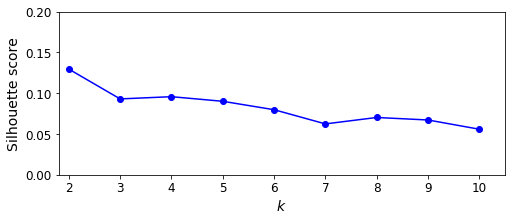

In [86]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.0, 0.2])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

k = 2 has the best Silhouette Score, the first step is split the London Wards into 2 clusters

In [87]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=150).fit(df_09)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [88]:
# Create Merge DataFrame
df_11 = pd.DataFrame(df_10)

# add clustering labels
df_09.insert(0, 'Cluster Labels', kmeans.labels_)

# Merge Addresses with Clusters
df_11 = df_11.join(df_09)

df_11.head() # check the last columns!

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abbey Wood,Greenwich,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,"Abbey,Barking and Dagenham,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Abbey,Merton,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Abingdon,Kensington and Chelsea,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00


In [89]:
# Check Cluster of Library Hotel
x=0
for i in range(len(df_11)):
    if df_11.iloc[i][0] == 'Grand Central Terminal,Manhattan,New York':
        x = i
        
df_11.iloc[[x]]

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
218,"Grand Central Terminal,Manhattan,New York",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Level 1: Cluster Labels 0
df_12 = df_11[df_11['Cluster Labels'] == 0]
df_12.reset_index(drop=True,inplace=True)
print(df_12.shape)
df_12.head()

(330, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01000,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abbey,Merton,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,"Abingdon,Kensington and Chelsea,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
3,"Acton Central,Ealing,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02439,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Addison,Hammersmith and Fulham,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [91]:
# Level 1: Cluster Labels 1
df_13 = df_11[df_11['Cluster Labels'] == 1]
df_13.reset_index(drop=True,inplace=True)
print(df_13.shape)
df_13.head()

(264, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Wood,Greenwich,London",1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Abbey,Barking and Dagenham,London",1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Addiscombe,Croydon,London",1,0.0,0.0,0.023256,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Aldborough,Redbridge,London",1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Alexandra,Kingston upon Thames,London",1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.2 Level 2: Cluster Level 1 London Wards with Cluster Label 0 
Cluster Label 0 of Level 1 has been chosen for further clustering as this represent the cluster of Library Hotel

In [92]:
# DataFrame to be Clustered
df_14 = df_12.drop(['Address','Cluster Labels'],1) 
df_14.head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01000,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02439,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [93]:
# DataFrame Holding the Addresses for merging back post-cluster
df_15 = df_12[['Address']]
df_15.head()

,Address
0,"Abbey Road,Westminster,London"
1,"Abbey,Merton,London"
2,"Abingdon,Kensington and Chelsea,London"
3,"Acton Central,Ealing,London"
4,"Addison,Hammersmith and Fulham,London"


In [94]:
# Calculate Silhouette Score for Various k clusters so that to identify optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init=150).fit(df_14) for k in range(1, 11)]
silhouette_scores = [silhouette_score(df_14, model.labels_) for model in kmeans_per_k[1:]]

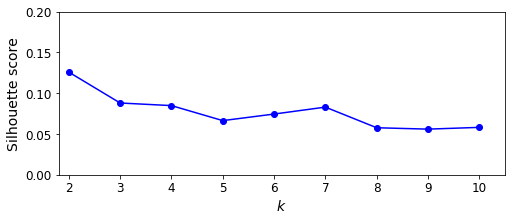

In [95]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.0, 0.2])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

k = 2 has the best Silhouette Score, the London Wards will be split into 2 clusters

In [96]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=150).fit(df_14)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [97]:
# Create Merge DataFrame
df_16 = pd.DataFrame(df_15)

# add clustering labels
df_14.insert(0, 'Cluster Labels', kmeans.labels_)

# Merge Addresses with Clusters
df_16 = df_16.join(df_14)

df_16.head() # check the last columns!

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.01000,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abbey,Merton,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,"Abingdon,Kensington and Chelsea,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
3,"Acton Central,Ealing,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02439,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Addison,Hammersmith and Fulham,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [98]:
# Check Cluster of Library Hotel
x=0
for i in range(len(df_16)):
    if df_16.iloc[i][0] == 'Grand Central Terminal,Manhattan,New York':
        x = i
        
df_16.iloc[[x]]

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
113,"Grand Central Terminal,Manhattan,New York",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Level 2: Cluster Labels 0
df_17 = df_16[df_16['Cluster Labels'] == 0]
df_17.reset_index(drop=True,inplace=True)
print(df_17.shape)
df_17.head()

(243, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey,Merton,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Acton Central,Ealing,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.02439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Alexandra,Haringey,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.01000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Askew,Hammersmith and Fulham,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.01000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Balham,Wandsworth,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.01000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Level 2: Cluster Labels 1
df_18 = df_16[df_16['Cluster Labels'] == 1]
df_18.reset_index(drop=True,inplace=True)
print(df_18.shape)
df_18.head()

(87, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abingdon,Kensington and Chelsea,London",1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,"Addison,Hammersmith and Fulham,London",1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Bayswater,Westminster,London",1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,"Bedfont,Hounslow,London",1,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


### 5.3 Level 3: Cluster Level 2 London Wards with Cluster Label 1
Cluster Label 1 of Level 2 has been chosen for further clustering as this represent the cluster of Library Hotel


In [123]:
# DataFrame to be Clustered
df_19 = df_18.drop(['Address','Cluster Labels'],1) 
df_19.head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [124]:
# DataFrame Holding the Addresses for merging back post-cluster
df_20 = df_18[['Address']]
df_20.head()

,Address
0,"Abbey Road,Westminster,London"
1,"Abingdon,Kensington and Chelsea,London"
2,"Addison,Hammersmith and Fulham,London"
3,"Bayswater,Westminster,London"
4,"Bedfont,Hounslow,London"


In [125]:
# Calculate Silhouette Score for Various k clusters so that to identify optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init=150).fit(df_19) for k in range(1, 11)]
silhouette_scores = [silhouette_score(df_19, model.labels_) for model in kmeans_per_k[1:]]

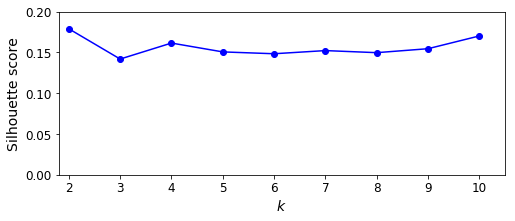

In [126]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.0, 0.2])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

k = 2 has the best Silhouette Score, the London Wards will be split into 2 clusters

In [127]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=150).fit(df_19)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [128]:
# Create Merge DataFrame
df_21 = pd.DataFrame(df_20)

# add clustering labels
df_19.insert(0, 'Cluster Labels', kmeans.labels_)

# Merge Addresses with Clusters
df_21 = df_21.join(df_19)

df_21.head() # check the last columns!

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abingdon,Kensington and Chelsea,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,"Addison,Hammersmith and Fulham,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Bayswater,Westminster,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,"Bedfont,Hounslow,London",0,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [129]:
# Check Cluster of Library Hotel
x=0
for i in range(len(df_21)):
    if df_21.iloc[i][0] == 'Grand Central Terminal,Manhattan,New York':
        x = i
        
df_21.iloc[[x]]

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
27,"Grand Central Terminal,Manhattan,New York",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# Level 3: Cluster Labels 0
df_22 = df_21[df_21['Cluster Labels'] == 0]
df_22.reset_index(drop=True,inplace=True)
print(df_22.shape)
df_22.head()

(72, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abingdon,Kensington and Chelsea,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,"Addison,Hammersmith and Fulham,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Bayswater,Westminster,London",0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,"Bedfont,Hounslow,London",0,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [131]:
# Level 3: Cluster Labels 1
df_23 = df_21[df_21['Cluster Labels'] == 1]
df_23.reset_index(drop=True,inplace=True)
print(df_23.shape)
df_23.head()

(15, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Broad Green,Croydon,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Greenford Green,Ealing,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Greenhill,Harrow,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.015385,0.0,0.0,0.0,0.0,0.0
3,"Kenton East,Harrow,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.014493,0.0,0.0,0.0,0.0,0.0
4,"Kenton West,Harrow,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.014493,0.0,0.0,0.0,0.0,0.0


### 5.4 Level 4: Cluster Level 3 London Wards with Cluster Label 0
Cluster Label 0 of Level 3 has been chosen for further clustering as this represent the cluster of Library Hotel

In [137]:
# DataFrame to be Clustered
df_24 = df_22.drop(['Address','Cluster Labels'],1) 
df_24.head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [141]:
# DataFrame Holding the Addresses for merging back post-cluster
df_25 = df_22[['Address']]
df_25.head()

,Address
0,"Abbey Road,Westminster,London"
1,"Abingdon,Kensington and Chelsea,London"
2,"Addison,Hammersmith and Fulham,London"
3,"Bayswater,Westminster,London"
4,"Bedfont,Hounslow,London"


In [142]:
# Calculate Silhouette Score for Various k clusters so that to identify optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init=150).fit(df_24) for k in range(1, 11)]
silhouette_scores = [silhouette_score(df_24, model.labels_) for model in kmeans_per_k[1:]]

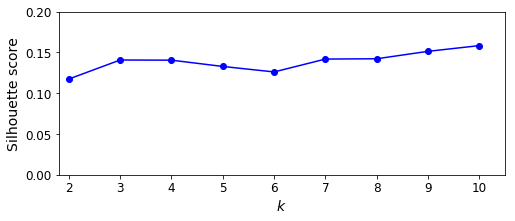

In [143]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.0, 0.2])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

k = 10 has the best Silhouette Score, the London Wards will be split into 10 clusters

In [145]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=150).fit(df_24)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 6, 9, 4, 7, 0, 2, 3, 0, 6], dtype=int32)

In [146]:
# Create Merge DataFrame
df_26 = pd.DataFrame(df_25)

# add clustering labels
df_24.insert(0, 'Cluster Labels', kmeans.labels_)

# Merge Addresses with Clusters
df_26 = df_26.join(df_24)

df_26.head() # check the last columns!

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Abingdon,Kensington and Chelsea,London",6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,"Addison,Hammersmith and Fulham,London",9,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Bayswater,Westminster,London",4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
4,"Bedfont,Hounslow,London",7,0.016667,0.0,0.0,0.0,0.133333,0.016667,0.016667,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [147]:
# Check Cluster of Library Hotel
x=0
for i in range(len(df_26)):
    if df_26.iloc[i][0] == 'Grand Central Terminal,Manhattan,New York':
        x = i
        
df_26.iloc[[x]]

,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
26,"Grand Central Terminal,Manhattan,New York",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# Level 4: Cluster Labels 0
df_27 = df_26[df_26['Cluster Labels'] == 0]
df_27.reset_index(drop=True,inplace=True)
print(df_27.shape)
df_27.head()

(11, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Bloomsbury,Camden,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,"Bunhill,Islington,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00
2,"Clerkenwell,Islington,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,"Harlesden,Brent,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Haverstock,Camden,London",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.03,0.01,0.04


In [149]:
# Level 4: Cluster Labels 1
df_28 = df_26[df_26['Cluster Labels'] == 1]
df_28.reset_index(drop=True,inplace=True)
print(df_28.shape)
df_28.head()

(5, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Canary Wharf,Tower Hamlets,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Lansbury,Tower Hamlets,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Limehouse,Tower Hamlets,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Poplar,Tower Hamlets,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Shadwell,Tower Hamlets,London",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Level 4: Cluster Labels 2
df_29 = df_26[df_26['Cluster Labels'] == 2]
df_29.reset_index(drop=True,inplace=True)
print(df_29.shape)
df_29.head()

(5, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Bridge,Redbridge,London",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,"Grand Central Terminal,Manhattan,New York",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,"Holborn and Covent Garden,Camden,London",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,"St. James's,Westminster,London",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.01,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
4,"Village,Merton,London",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [151]:
# Level 4: Cluster Labels 3
df_30 = df_26[df_26['Cluster Labels'] == 3]
df_30.reset_index(drop=True,inplace=True)
print(df_30.shape)
df_30.head()

(10, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Bryanston and Dorset Square,Westminster,London",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
1,"Churchill,Westminster,London",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
2,"Hyde Park,Westminster,London",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,"Knightsbridge and Belgravia,Westminster,London",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,"Lancaster Gate,Westminster,London",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0


In [152]:
# Level 4: Cluster Labels 4
df_31 = df_26[df_26['Cluster Labels'] == 4]
df_31.reset_index(drop=True,inplace=True)
print(df_31.shape)
df_31.head()

(8, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abbey Road,Westminster,London",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02
1,"Bayswater,Westminster,London",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,"Church Street,Westminster,London",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00
3,"Coppetts,Barnet,London",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,"Harrow Road,Westminster,London",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00


In [153]:
# Level 4: Cluster Labels 5
df_32 = df_26[df_26['Cluster Labels'] == 5]
df_32.reset_index(drop=True,inplace=True)
print(df_32.shape)
df_32.head()

(8, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Chaucer,Southwark,London",5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"City of London,City of London,London",5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"College,Southwark,London",5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Ferndale,Lambeth,London",5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Grange,Southwark,London",5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Level 4: Cluster Labels 6
df_33 = df_26[df_26['Cluster Labels'] == 6]
df_33.reset_index(drop=True,inplace=True)
print(df_33.shape)
df_33.head()

(9, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Abingdon,Kensington and Chelsea,London",6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.0,0.0
1,"Campden,Kensington and Chelsea,London",6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.0,0.0
2,"Chelsea Riverside,Kensington and Chelsea,London",6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0
3,"Courtfield,Kensington and Chelsea,London",6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.0,0.0
4,"Earl's Court,Kensington and Chelsea,London",6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [155]:
# Level 4: Cluster Labels 7
df_34 = df_26[df_26['Cluster Labels'] == 7]
df_34.reset_index(drop=True,inplace=True)
print(df_34.shape)
df_34.head()

(6, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Bedfont,Hounslow,London",7,0.016667,0.0,0.0,0.00,0.133333,0.016667,0.016667,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Canning Town North,Newham,London",7,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.010000,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Canning Town South,Newham,London",7,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.010000,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Custom House,Newham,London",7,0.000000,0.0,0.0,0.00,0.000000,0.013158,0.000000,0.013158,...,0.013158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Peninsula,Greenwich,London",7,0.000000,0.0,0.0,0.01,0.010000,0.020000,0.010000,0.010000,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Level 4: Cluster Labels 8
df_35 = df_26[df_26['Cluster Labels'] == 8]
df_35.reset_index(drop=True,inplace=True)
print(df_35.shape)
df_35.head()

(1, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Heathfield,Croydon,London",8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Level 4: Cluster Labels 9
df_36 = df_26[df_26['Cluster Labels'] == 9]
df_36.reset_index(drop=True,inplace=True)
print(df_36.shape)
df_36.head()

(9, 438)


,Address,Cluster Labels,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Addison,Hammersmith and Fulham,London",9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,"Colville,Kensington and Chelsea,London",9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,"Norland,Kensington and Chelsea,London",9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0
3,"Pembridge,Kensington and Chelsea,London",9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0
4,"Shepherd's Bush Green,Hammersmith and Fulham,L...",9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


<a id='item6'></a>

# Part 6: Examine London Locations for Library Hotel

In [174]:
# DataFrame of Venues
df_37 = df_29.drop(['Address','Cluster Labels'],1) 
df_37.head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.01,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.01,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,...,0.00,0.01,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.01,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [175]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Address']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_38 = pd.DataFrame(columns=columns)
df_38['Address'] = df_29['Address']

for ind in np.arange(df_37.shape[0]):
    df_38.iloc[ind, 1:] = return_most_common_venues(df_37.iloc[ind, :], num_top_venues)

df_38.head()

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bridge,Redbridge,London",Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar
1,"Grand Central Terminal,Manhattan,New York",Theater,Plaza,Hotel,Korean Restaurant,American Restaurant,Japanese Restaurant,Gym,Gym / Fitness Center,Sushi Restaurant,Burger Joint
2,"Holborn and Covent Garden,Camden,London",Theater,Ice Cream Shop,Hotel,Coffee Shop,Steakhouse,Cocktail Bar,Bakery,Liquor Store,Arts & Crafts Store,Beer Bar
3,"St. James's,Westminster,London",Hotel,Clothing Store,Art Gallery,Indian Restaurant,Boutique,Theater,Ice Cream Shop,Lounge,Art Museum,Cocktail Bar
4,"Village,Merton,London",Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar


In [176]:
df_39 = pd.DataFrame()

for i in range(len(df_38)):
    for j in range(len(df_04)):
        if(df_38['Address'][i] == df_04['Address'][j] ):
            df_39 = df_39.append(df_04.iloc[j])

df_39 = df_39.drop(['Address','Borough name','City','Ward name'],1)
df_39.reset_index(drop=True,inplace=True)

df_40 = pd.DataFrame(df_38)
df_40.insert(1,'Latitude',df_39[['Latitude']])
df_40.insert(2,'Longitude',df_39[['Longitude']])

In [177]:
df_40.head()

,Address,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bridge,Redbridge,London",51.507322,-0.127647,Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar
1,"Grand Central Terminal,Manhattan,New York",40.752806,-73.977179,Theater,Plaza,Hotel,Korean Restaurant,American Restaurant,Japanese Restaurant,Gym,Gym / Fitness Center,Sushi Restaurant,Burger Joint
2,"Holborn and Covent Garden,Camden,London",51.515825,-0.125985,Theater,Ice Cream Shop,Hotel,Coffee Shop,Steakhouse,Cocktail Bar,Bakery,Liquor Store,Arts & Crafts Store,Beer Bar
3,"St. James's,Westminster,London",51.507908,-0.136573,Hotel,Clothing Store,Art Gallery,Indian Restaurant,Boutique,Theater,Ice Cream Shop,Lounge,Art Museum,Cocktail Bar
4,"Village,Merton,London",51.507322,-0.127647,Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar


By typing the addresses in Nominatim at https://nominatim.openstreetmap.org it became evident that the Geocoding service has assigned the same Latitude and Longitude for Bridge, Redbridge, London and Village, Merton, London. More importantly, this is the address for Charing Cross, Westminster London. The DataFrame will be corrected to reflect those errors.

In [178]:
df_41 = df_40.replace('Bridge,Redbridge,London','Charing Corss,Westminster,London')
df_41

,Address,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Charing Corss,Westminster,London",51.507322,-0.127647,Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar
1,"Grand Central Terminal,Manhattan,New York",40.752806,-73.977179,Theater,Plaza,Hotel,Korean Restaurant,American Restaurant,Japanese Restaurant,Gym,Gym / Fitness Center,Sushi Restaurant,Burger Joint
2,"Holborn and Covent Garden,Camden,London",51.515825,-0.125985,Theater,Ice Cream Shop,Hotel,Coffee Shop,Steakhouse,Cocktail Bar,Bakery,Liquor Store,Arts & Crafts Store,Beer Bar
3,"St. James's,Westminster,London",51.507908,-0.136573,Hotel,Clothing Store,Art Gallery,Indian Restaurant,Boutique,Theater,Ice Cream Shop,Lounge,Art Museum,Cocktail Bar
4,"Village,Merton,London",51.507322,-0.127647,Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar


In [182]:
df_41 = df_41.drop(index=4)

In [183]:
df_41

,Address,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Charing Corss,Westminster,London",51.507322,-0.127647,Theater,Ice Cream Shop,Hotel,Bookstore,Dessert Shop,Bakery,Plaza,Gourmet Shop,Garden,Cocktail Bar
1,"Grand Central Terminal,Manhattan,New York",40.752806,-73.977179,Theater,Plaza,Hotel,Korean Restaurant,American Restaurant,Japanese Restaurant,Gym,Gym / Fitness Center,Sushi Restaurant,Burger Joint
2,"Holborn and Covent Garden,Camden,London",51.515825,-0.125985,Theater,Ice Cream Shop,Hotel,Coffee Shop,Steakhouse,Cocktail Bar,Bakery,Liquor Store,Arts & Crafts Store,Beer Bar
3,"St. James's,Westminster,London",51.507908,-0.136573,Hotel,Clothing Store,Art Gallery,Indian Restaurant,Boutique,Theater,Ice Cream Shop,Lounge,Art Museum,Cocktail Bar


In [184]:
# create map of London Wards using latitude and longitude values
map_locations = folium.Map(location=[51.5, -0.125], zoom_start=13)

lat = 0
lng = 0
address =""


# add markers to map
for i in range(0,len(df_41)):
    # Step 1: Get geospatial coordinates for each Neighbourhood
    lat = df_41["Latitude"][i]
    lng = df_41["Longitude"][i]
    address = df_41["Address"][i]
    # Step 2: Parse geospatial coordinates onto the map of Toronoto 
    label = '{}'.format(address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_locations)
    
map_locations